Question 1

Question 2

In [1]:
import numpy as np 
import sklearn
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

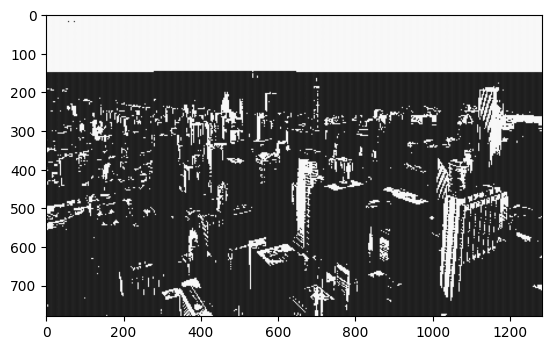

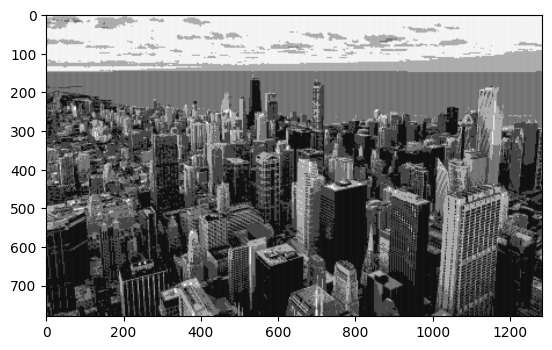

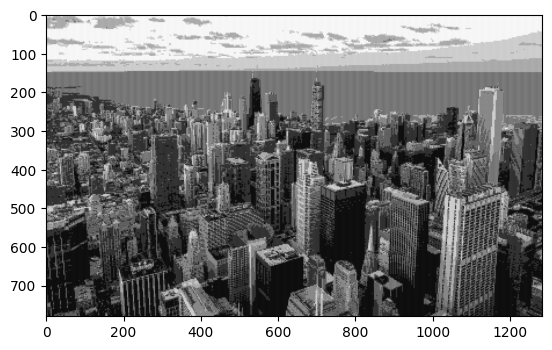

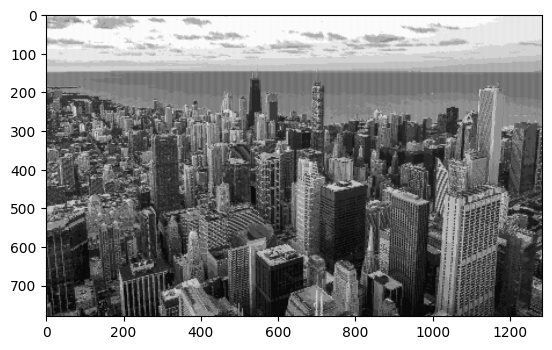

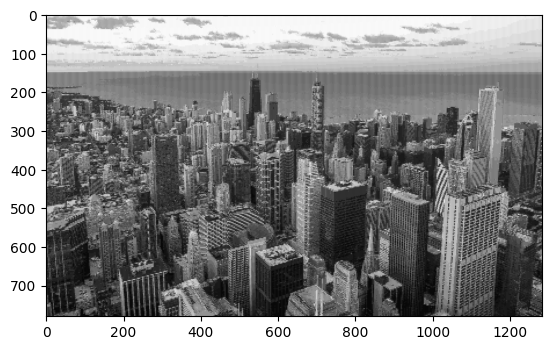

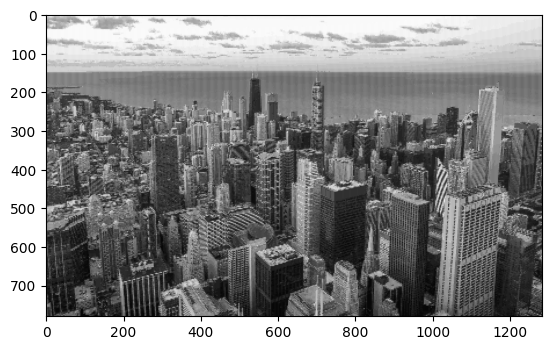

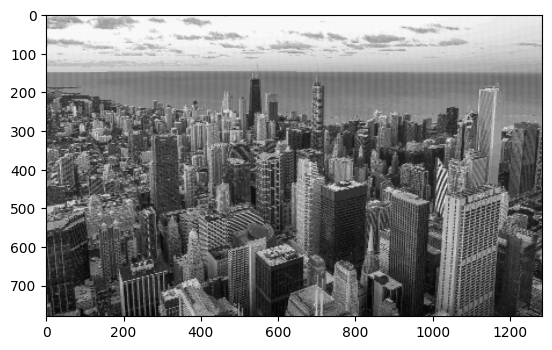

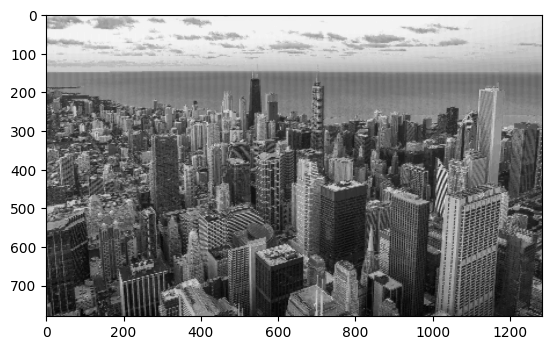

In [39]:
import sklearn.cluster

def find_chunk(y,x, img_x):
    return (y//3)*(img_x//3) + x//3

def find_vector_index(j,i):
    return (j)*(3) + i

def reconstruct_index_to_pixel(vector, i): 
    pixel = np.array(vector[i:i+3])
    return pixel

k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
img = mpimg.imread('cityview.png') # colors between 0 and 1

# split image into 3 by 3 chunks
index_chunk_dict = {}
chunks = [ img[i:i+3, j:j+3] for i in range(0, img.shape[0], 3) for j in range(0, img.shape[1], 3) ]

# transform each chunk into a vector
matrix = np.array([np.ndarray.flatten(chunk) for chunk in chunks])

# apply k-means clustering
reconstructed_images = []
for k in k_list:
    reconstructed_img = np.zeros(img.shape)
    centroids, label, inertia = sklearn.cluster.k_means(matrix, k)

    # reconstruct image
    for y in range(0, img.shape[0], 3):
        for x in range(0, img.shape[1], 3):
            chunk_index = find_chunk(y,x,img.shape[1]) # num chunks
            cluster_number = label[chunk_index] # k = num clusters - labels
            for j in range(3):
                for i in range(3):
                    vector_index = find_vector_index(j,i) # 27 features
                    reconstructed_img[y + j,x + i] = reconstruct_index_to_pixel(centroids[cluster_number], vector_index)
            # for bottom in range(0, 3):
            #     for left in range(0, 3):
            #         cluster_center_vector = centroids[label[i]] # 3 vs 27
            #         left_most_pixel = i * 3 + j*3
            #         # print(len(reconstructed_img[bottom, left]))
            #         # print(len(cluster_center_vector[left_most_pixel:left_most_pixel+3]))
            #         reconstructed_img[i, j] = cluster_center_vector[left_most_pixel:left_most_pixel+3]

    reconstructed_images.append(reconstructed_img)

for recon_img in reconstructed_images:
    plt.imshow(recon_img[:,:,0]/255, cmap='gray')
    plt.show()



In [47]:
# plt.imshow(reconstructed_img[:,:, 0]/255, cmap = 'viridis')
# plt.show()


Question 3

In [54]:
recon_errors = {}
k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
for i, recon_img in enumerate(reconstructed_images):
    squared_error = 0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                squared_error += abs(recon_img[y,x,c] - img[y,x,c])**2
    mean_squared_error = squared_error/(img.shape[0]*img.shape[1]*img.shape[2])
    recon_errors[k_list[i]] = mean_squared_error
print('k , mean squared error')
for item in recon_errors.items():
    print(item, '\n') 

k , mean squared error
(2, np.float64(0.033199822134210306)) 

(5, np.float64(0.018813683524932734)) 

(10, np.float64(0.019915602307155722)) 

(50, np.float64(0.02223695239388678)) 

(200, np.float64(0.023359493059678934)) 

(500, np.float64(0.02389791049682605)) 

(1000, np.float64(0.02425696847205511)) 

(2000, np.float64(0.024531548149513537)) 



Question 4

In [56]:
# total numbers for compressed image for each k

# centroids = k cluster mid points * 27 features

# each chunk (111,280) has a cluster number (k)
# each chunk is made up of 3x3 pixels
# each pixel is made up of 3 features

# 27 total numbers per chunk and centroid

# each centroid is a 27 feature vector, k centroids


# need chunk array - 111280
# need label array - 111280
# need array centroids of size k * 27
# do we need img size? if so, does it count as a 2 numbers (x, y) or a number for each entry 1284 x 780

# total = k * 27 + 2 * 111280
compressed_sizes = {}
print("k : total numbers\n")
for k in k_list:
    compressed_sizes[k] = k*27 + 2 * 111280
    print(k, ':', k*27 + 2 * 111280, '\n')

k : total numbers

2 : 222614 

5 : 222695 

10 : 222830 

50 : 223910 

200 : 227960 

500 : 236060 

1000 : 249560 

2000 : 276560 



Question 5

In [59]:
# Compression rate = compressed size / original size

original_size = 1284 * 780 * 3
print(original_size)
print("k : compression rate\n")
for k in k_list:
    print(k, ':', compressed_sizes[k] / original_size, '\n')

3004560
k : compression rate

2 : 0.07409204675559816 

5 : 0.07411900577788429 

10 : 0.07416393748169449 

50 : 0.07452339111217617 

200 : 0.07587134222648241 

500 : 0.07856724445509493 

1000 : 0.08306041483611577 

2000 : 0.09204675559815746 

